# Submitted BY MOHD SHADAB

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
train=pd.read_csv(r"C:\Users\Mohd Shadab\Downloads\Projects\Machine Learning\Assesment Datasets\Income Qualification\train.csv")
test=pd.read_csv(r"C:\Users\Mohd Shadab\Downloads\Projects\Machine Learning\Assesment Datasets\Income Qualification\test.csv")

In [3]:
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [5]:
print(train.shape)  
print(test.shape) # Doesn't contain the target data so one less column

(9557, 143)
(23856, 142)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [7]:
#There are 130 columns of int type,8 columns are of float type and 5 object type columns.

* **Output Variable**

In [8]:
#The output variable is mentioned amongs the column by the name Target. 
#Looking at the target we can easily say its a classification type column 

In [9]:
tar_class=train['Target'].value_counts()
tar_class

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

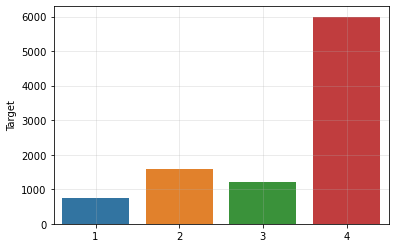

In [10]:
sns.barplot(tar_class.index,tar_class)
plt.grid(alpha=0.3)
plt.show()

In [11]:
# So there are four classes in the target column 
#1 = extreme poverty
#2 = moderate poverty
#3 = vulnerable households
#4 = non vulnerable households

* **Understand the type of data.**

In [12]:
train.dtypes.head(60)

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
v14a                 int64
refrig               int64
v18q                 int64
v18q1              float64
r4h1                 int64
r4h2                 int64
r4h3                 int64
r4m1                 int64
r4m2                 int64
r4m3                 int64
r4t1                 int64
r4t2                 int64
r4t3                 int64
tamhog               int64
tamviv               int64
escolari             int64
rez_esc            float64
hhsize               int64
paredblolad          int64
paredzocalo          int64
paredpreb            int64
pareddes             int64
paredmad             int64
paredzinc            int64
paredfibras          int64
paredother           int64
pisomoscer           int64
pisocemento          int64
pisoother            int64
pisonatur            int64
pisonotiene          int64
pisomadera           int64
t

In [13]:
train.dtypes.tail(60)

parentesco1          int64
parentesco2          int64
parentesco3          int64
parentesco4          int64
parentesco5          int64
parentesco6          int64
parentesco7          int64
parentesco8          int64
parentesco9          int64
parentesco10         int64
parentesco11         int64
parentesco12         int64
idhogar             object
hogar_nin            int64
hogar_adul           int64
hogar_mayor          int64
hogar_total          int64
dependency          object
edjefe              object
edjefa              object
meaneduc           float64
instlevel1           int64
instlevel2           int64
instlevel3           int64
instlevel4           int64
instlevel5           int64
instlevel6           int64
instlevel7           int64
instlevel8           int64
instlevel9           int64
bedrooms             int64
overcrowding       float64
tipovivi1            int64
tipovivi2            int64
tipovivi3            int64
tipovivi4            int64
tipovivi5            int64
c

In [14]:
train.nunique().head(60)


Id                 9557
v2a1                157
hacdor                2
rooms                11
hacapo                2
v14a                  2
refrig                2
v18q                  2
v18q1                 6
r4h1                  6
r4h2                  9
r4h3                  9
r4m1                  6
r4m2                  7
r4m3                  9
r4t1                  7
r4t2                 11
r4t3                 13
tamhog               13
tamviv               14
escolari             22
rez_esc               6
hhsize               13
paredblolad           2
paredzocalo           2
paredpreb             2
pareddes              2
paredmad              2
paredzinc             2
paredfibras           2
paredother            2
pisomoscer            2
pisocemento           2
pisoother             2
pisonatur             2
pisonotiene           2
pisomadera            2
techozinc             2
techoentrepiso        2
techocane             2
techootro             2
cielorazo       

In [15]:
#Many of the columns seems to be of the class type with 0 and 1 as output

* **Check if there are any biases in your dataset.**

In [16]:
print("4  ",train[train['Target']==4]['Target'].count()/train['Target'].count()*100)
print("3  ",train[train['Target']==3]['Target'].count()/train['Target'].count()*100)
print("2  ",train[train['Target']==2]['Target'].count()/train['Target'].count()*100)
print("1  ",train[train['Target']==1]['Target'].count()/train['Target'].count()*100)

4   62.739353353562834
3   12.650413309615988
2   16.710264727424924
1   7.899968609396255


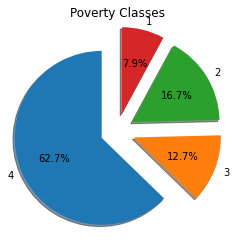

In [17]:
labels = '4', '3', '2', '1'
sizes = [train[train['Target']==4]['Target'].count()/train['Target'].count()*100,train[train['Target']==3]['Target'].count()/train['Target'].count()*100,train[train['Target']==2]['Target'].count()/train['Target'].count()*100,train[train['Target']==1]['Target'].count()/train['Target'].count()*100]
explode = (0.2, 0.2, 0.2, 0.2)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title("Poverty Classes");

In [18]:
#Class 4 dominates in the data

In [19]:
#No data seems to be in the range of 90%,hence this can't be classified as imbalanced data

* **Check whether all members of the house have the same poverty level.**

In [20]:
#idhogar represents the household identifier, basically serving as family member counts

In [21]:
poverty_check1=train.groupby(['idhogar'])[['Target']].sum().sort_values(by=['Target']).reset_index()
poverty_check2=pd.DataFrame(train.groupby('idhogar').size().sort_values(ascending=False))
poverty_check=pd.merge(poverty_check1,poverty_check2,on=['idhogar']).rename(columns={'Target':'Target_sum',0:'Family_members'})
poverty_check

,idhogar,Target_sum,Family_members
0,7ef91ff79,1,1
1,5b0aa5865,1,1
2,87dfa584d,1,1
3,0f70c06f4,1,1
4,7789c8d4b,1,1
...,...,...,...
2983,a18c0c0be,40,10
2984,0fc6c05f7,40,10
2985,4476ccd4c,44,11
2986,6b35cdcf0,44,11


In [22]:
idho=[]
summ=[]
fam=[]
for x in range(0,len(poverty_check['idhogar'])):
    if poverty_check['Target_sum'][x]==poverty_check['Family_members'][x]*1 or poverty_check['Target_sum'][x]==poverty_check['Family_members'][x]*2 or poverty_check['Target_sum'][x]== poverty_check['Family_members'][x]*3 or poverty_check['Target_sum'][x]==poverty_check['Family_members'][x]*4:
           continue

    else:
        idho.append(poverty_check['idhogar'][x])
        summ.append(poverty_check['Target_sum'][x])
        fam.append(poverty_check['Family_members'][x])
list=[idho,summ,fam]        
unequal_poverty=pd.DataFrame({'idhogar':idho,'Target_sum':summ,'Family_members':fam})

In [23]:
unequal_poverty

,idhogar,Target_sum,Family_members
0,3c73c107f,3,2
1,3df651058,3,2
2,410194c8b,3,2
3,0f3e65c83,4,3
4,03f4e5f4d,4,3
...,...,...,...
79,71cd52a80,15,4
80,0511912b6,15,4
81,5c3f7725d,19,7
82,7ea6aca15,19,5


In [24]:
# Let's Verify if the above results are true
#84 families have different poverty class among different family members

In [25]:
pd.DataFrame(train[train['idhogar']=='3c73c107f'][['idhogar','Target']]),pd.DataFrame(train[train['idhogar']=='3fe29a56b'][['idhogar','Target']])

(        idhogar  Target
 8204  3c73c107f       1
 8205  3c73c107f       2,
         idhogar  Target
 5136  3fe29a56b       3
 5137  3fe29a56b       2
 5138  3fe29a56b       2
 5139  3fe29a56b       3
 5140  3fe29a56b       3
 5141  3fe29a56b       3
 5142  3fe29a56b       3
 5143  3fe29a56b       3
 5144  3fe29a56b       3
 5145  3fe29a56b       2
 5146  3fe29a56b       2)

In [26]:
#Hence we can confirm that our filter worked well.

* **Check if there is a house without a family head.**

In [27]:
train[train['parentesco1']==0].groupby('idhogar')['parentesco1'].sum().sort_values(ascending=False)

idhogar
001ff74ca    0
ab956807c    0
aadb03025    0
aae86b151    0
aafe35b5e    0
            ..
56f62beb4    0
57058094a    0
5712fc93b    0
573526e69    0
fff7d6be1    0
Name: parentesco1, Length: 2600, dtype: int64

In [28]:
head_df=pd.DataFrame(train.groupby('idhogar')['parentesco1'].sum().sort_values().reset_index())
head_df.rename(columns={'parentesco1':'Head_in_Family'},inplace=True)


In [29]:
x=head_df[head_df['Head_in_Family']==0]
x

,idhogar,Head_in_Family
0,1bc617b23,0
1,03c6bdf85,0
2,61c10e099,0
3,ad687ad89,0
4,1367ab31d,0
5,f2bfa75c4,0
6,6b1b2405f,0
7,896fe6d3e,0
8,c0c8a5013,0
9,b1f4d89d7,0


In [30]:
# 15 families doesn't have household head out of 2988 families. Since this is a low number, we can modify or neglect the results.

* **Set poverty level of the members and the head of the house within a family.**

In [31]:
# So we have already found out the families that don't have the same poverty level
#As per the question we have to set the poverty level of all family members as per the head of the family

In [32]:
unequal_poverty #unequal poverty class among family members

,idhogar,Target_sum,Family_members
0,3c73c107f,3,2
1,3df651058,3,2
2,410194c8b,3,2
3,0f3e65c83,4,3
4,03f4e5f4d,4,3
...,...,...,...
79,71cd52a80,15,4
80,0511912b6,15,4
81,5c3f7725d,19,7
82,7ea6aca15,19,5


In [33]:
# So there are 84 families where the target values among the family members is not equal

In [34]:
new_df=pd.merge(unequal_poverty,train.loc[:,['idhogar','parentesco1','Target']],on='idhogar')

In [35]:
new_df=new_df.drop(['Target_sum',],axis=1)
new_df.iloc[:5]

,idhogar,Family_members,parentesco1,Target
0,3c73c107f,2,1,1
1,3c73c107f,2,0,2
2,3df651058,2,1,1
3,3df651058,2,0,2
4,410194c8b,2,1,2


In [36]:
new_df.shape

(332, 4)

* **Count how many null values are existing in columns**

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [38]:
pd.DataFrame(train.isnull().sum().sort_values(ascending=False).head(20))

,0
rez_esc,7928
v18q1,7342
v2a1,6860
SQBmeaned,5
meaneduc,5
Id,0
hogar_adul,0
parentesco10,0
parentesco11,0
parentesco12,0


In [39]:
#rez_esc	7928
#v18q1	7342
#v2a1	6860
#SQBmeaned	5
#meaneduc	5
#are the only columns that contains the null values

* **Remove null value rows of the target variable.**

In [40]:
train['Target'].isnull().sum() # Since there are no null values, no row should be removed

0

* **Predict the accuracy using random forest classifier.**

* ***Cleaning the data***

In [41]:
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [42]:
train.isnull().sum().sort_values(ascending=False)

rez_esc            7928
v18q1              7342
v2a1               6860
SQBmeaned             5
meaneduc              5
                   ... 
abastaguadentro       0
cielorazo             0
techootro             0
techocane             0
Target                0
Length: 143, dtype: int64

In [43]:
#rez_esc            7928
#v18q1              7342
#v2a1               6860
#contains significant amount of data in null so removing such columns
# removing unique identification number such as 'id' and 'idhogar'

In [44]:
new_train=train.drop(['rez_esc','v18q1','v2a1','Id','idhogar'],axis=1)
new_train.head()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,0,3,0,1,1,0,0,1,1,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,0,4,0,1,1,1,0,1,1,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,0,8,0,1,1,0,0,0,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,0,5,0,1,1,1,0,2,2,1,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,0,5,0,1,1,1,0,2,2,1,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [45]:
new_train.isnull().sum().sort_values(ascending=False)

SQBmeaned          5
meaneduc           5
hacdor             0
hogar_total        0
parentesco10       0
                  ..
abastaguano        0
abastaguafuera     0
abastaguadentro    0
cielorazo          0
Target             0
Length: 138, dtype: int64

In [46]:
new_train.loc[:,['SQBmeaned','meaneduc']]

,SQBmeaned,meaneduc
0,100.0000,10.00
1,144.0000,12.00
2,121.0000,11.00
3,121.0000,11.00
4,121.0000,11.00
...,...,...
9552,68.0625,8.25
9553,68.0625,8.25
9554,68.0625,8.25
9555,68.0625,8.25


In [47]:
new_train['SQBmeaned'].fillna(new_train['SQBmeaned'].median(),inplace=True)
new_train['meaneduc'].fillna(new_train['meaneduc'].median(),inplace=True)

In [48]:
new_train.isnull().sum().sort_values(ascending=False) #Hence all the nulls have been treated

hacdor             0
hogar_total        0
parentesco10       0
parentesco11       0
parentesco12       0
                  ..
abastaguano        0
abastaguafuera     0
abastaguadentro    0
cielorazo          0
Target             0
Length: 138, dtype: int64

In [49]:
new_train.describe()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000
mean,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,0.385895,1.559171,1.945066,0.399184,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.577572,1643.774302,3.302292
std,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.680779,1.036574,1.188852,0.692460,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.493725,1741.197050,1.009565
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,3.000000,1.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,132.250000,2601.000000,4.000000
max,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,5.000000,8.000000,8.000000,6.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [50]:
new_train.dtypes

hacdor               int64
rooms                int64
hacapo               int64
v14a                 int64
refrig               int64
                    ...   
SQBovercrowding    float64
SQBdependency      float64
SQBmeaned          float64
agesq                int64
Target               int64
Length: 138, dtype: object

In [51]:
new_train.select_dtypes(include='object') # 5 Object type columns

,dependency,edjefe,edjefa
0,no,10,no
1,8,12,no
2,8,no,11
3,yes,11,no
4,yes,11,no
...,...,...,...
9552,.25,9,no
9553,.25,9,no
9554,.25,9,no
9555,.25,9,no


In [52]:
new_train['dependency'].value_counts() #Contains object type as well but as per information provided i.e. 
#rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
4             100
.75            98
.2             90
.40000001      84
1.3333334      84
2.5            77
5              24
1.25           18
3.5            18
.80000001      18
2.25           13
.71428573      12
1.75           11
1.2            11
.83333331      11
.22222222      11
.2857143        9
1.6666666       8
.60000002       8
6               7
.16666667       7
Name: dependency, dtype: int64

In [53]:
# Above column data can be treated as per these columns and considering dependency zero for 'NO' in dependency column. 
#hogar_nin, Number of children 0 to 19 in household
#98. hogar_adul, Number of adults in household
#99. hogar_mayor, # of individuals 65+ in the household
#100. hogar_total, # of total individuals in the household


In [54]:
#new_train.loc[:,['hogar_nin','hogar_adul','hogar_mayor','hogar_total']]
#new_train['New_dependency']=(new_train['hogar_nin']+new_train['hogar_mayor'])/new_train['hogar_adul']
#new_train['New_dependency'].value_counts()[:2] # This object data has been treated

In [55]:
new_train['dependency'].replace(to_replace='yes', value=1,inplace=True)
new_train['dependency'].replace(to_replace='no', value=0,inplace=True)
new_train['dependency'].value_counts()[:5] # Data type is also fixed

1      2192
0      1747
.5     1497
2       730
1.5     713
Name: dependency, dtype: int64

In [56]:
new_train['edjefe'].replace(to_replace='yes', value=1,inplace=True)
new_train['edjefe'].replace(to_replace='no', value=0,inplace=True)
new_train['edjefa'].replace(to_replace='yes', value=1,inplace=True)
new_train['edjefa'].replace(to_replace='no', value=0,inplace=True)
print(new_train['edjefa'].value_counts())
#both the rows treated

0     6230
6      947
11     399
9      237
8      217
15     188
7      179
5      176
3      152
4      136
14     120
16     113
10      96
2       84
17      76
12      72
1       69
13      52
21       5
19       4
18       3
20       2
Name: edjefa, dtype: int64


In [57]:
new_train['edjefa']=new_train['edjefa'].astype('int32')
new_train['edjefe']=new_train['edjefe'].astype('int32')

In [58]:
new_train.isnull().sum()

hacdor             0
rooms              0
hacapo             0
v14a               0
refrig             0
                  ..
SQBovercrowding    0
SQBdependency      0
SQBmeaned          0
agesq              0
Target             0
Length: 138, dtype: int64

In [59]:
new_train.dropna(inplace=True)
new_train

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,0,3,0,1,1,0,0,1,1,0,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,0,4,0,1,1,1,0,1,1,0,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,0,8,0,1,1,0,0,0,0,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,0,5,0,1,1,1,0,2,2,1,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,0,5,0,1,1,1,0,2,2,1,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,0,6,0,1,1,0,0,2,2,1,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,0,6,0,1,1,0,0,2,2,1,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,0,6,0,1,1,0,0,2,2,1,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,0,6,0,1,1,0,0,2,2,1,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


*Checking numeric columns*

In [60]:
y=new_train['Target']
x=new_train.drop(['Target'],axis=1)

# Build a Random Forest Model

In [61]:
#Importing random forest classifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

In [62]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.25,random_state=1)

In [63]:
#creating a random forest instance
for x in range(1,18):
    clf = RandomForestClassifier(random_state=12,max_depth=x)
    #train the model
    clf.fit(x_train,y_train)
    print(clf.score(x_train,y_train),x)

0.6282963583089158 1
0.6294125854611413 2
0.6469931631086926 3
0.6624808148458211 4
0.6746197851262732 5
0.6977814985349519 6
0.7265243477047579 7
0.769638621459467 8
0.8137295939723734 9
0.8548904702106879 10
0.8971675736012279 11
0.9225617413143574 12
0.9454443979349798 13
0.9658155434630947 14
0.980326496442026 15
0.988698200083717 16
0.9951165062090135 17


In [64]:
#After tuning the hyperparameter max depth for different values we can conclude that
#for decision tree of max depth =12 gives non-overfitting results

In [65]:
clf = RandomForestClassifier(random_state=12,max_depth=12)
#train the model
clf.fit(x_train,y_train)
print(clf.score(x_train,y_train),x)

0.9225617413143574 17


In [66]:
y_predict = clf.predict(x_test)

In [67]:
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[ 106   17    1   59]
 [   3  260    6  141]
 [   1   21  148  134]
 [   0    6    1 1486]]
              precision    recall  f1-score   support

           1       0.96      0.58      0.72       183
           2       0.86      0.63      0.73       410
           3       0.95      0.49      0.64       304
           4       0.82      1.00      0.90      1493

    accuracy                           0.84      2390
   macro avg       0.90      0.67      0.75      2390
weighted avg       0.85      0.84      0.82      2390



In [68]:
#looking at the feature importance
clf.feature_importances_

array([2.36087794e-03, 1.76432468e-02, 1.35358008e-03, 5.05699172e-04,
       3.13227304e-03, 1.21471088e-02, 1.00192657e-02, 1.51563425e-02,
       1.37571798e-02, 1.23110085e-02, 1.05852001e-02, 1.48823325e-02,
       2.05084754e-02, 1.55301048e-02, 1.22496934e-02, 1.04661116e-02,
       1.26396392e-02, 1.29593302e-02, 1.10845375e-02, 1.10135741e-02,
       4.41689734e-03, 7.00252093e-03, 8.70128409e-04, 6.27091658e-03,
       6.29373659e-04, 1.19088235e-04, 1.61176383e-04, 9.47989314e-03,
       5.85409973e-03, 0.00000000e+00, 9.96905344e-05, 1.48554953e-03,
       3.96672336e-03, 1.69269798e-03, 1.03147010e-03, 2.28098182e-04,
       1.32610466e-05, 1.55037803e-02, 2.18836115e-03, 1.79874008e-03,
       3.39231004e-04, 3.48391859e-03, 8.00483111e-05, 1.52442076e-04,
       3.93444066e-03, 2.49954865e-04, 4.35299095e-03, 4.13027201e-03,
       1.67965168e-03, 3.93118686e-04, 2.64764958e-04, 6.62435045e-03,
       6.31139280e-03, 4.61952944e-03, 4.51860097e-03, 2.00821460e-03,
      

<AxesSubplot:>

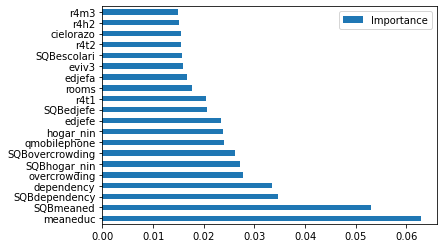

In [69]:
#feature importance against each variable
pd.DataFrame(clf.feature_importances_, index=x_train.columns,columns=['Importance']).sort_values(ascending=False,by=['Importance']).head(20).plot.barh()

In [70]:
#from the above features we can clearly say that:
#1 : meaneduc,SQBmeaned,SQBdepencency,dependency,overcrowding significantly influence the model.

# Testing the above model on test data 

In [71]:
test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [72]:
test.shape

(23856, 142)

In [73]:
test.isnull().sum().sort_values(ascending=False).head(20)

rez_esc         19653
v18q1           18126
v2a1            17403
meaneduc           31
SQBmeaned          31
instlevel1          0
edjefa              0
edjefe              0
dependency          0
parentesco8         0
hogar_mayor         0
hogar_adul          0
hogar_nin           0
idhogar             0
parentesco12        0
parentesco11        0
parentesco10        0
parentesco9         0
hogar_total         0
parentesco6         0
dtype: int64

In [74]:
#dropping null columns
test.drop(['rez_esc','v18q1','v2a1'],inplace=True,axis=1)

In [75]:
test.shape

(23856, 139)

In [76]:
#Checking the columnn meaneduc and SQBmeaned

In [77]:
test.loc[:,['SQBmeaned','meaneduc']]

,SQBmeaned,meaneduc
0,272.2500,16.50
1,272.2500,16.50
2,272.2500,16.50
3,256.0000,16.00
4,NaN,NaN
...,...,...
23851,33.0625,5.75
23852,36.0000,6.00
23853,36.0000,6.00
23854,36.0000,6.00


In [78]:
test['SQBmeaned'].fillna(new_train['SQBmeaned'].median(),inplace=True)
test['meaneduc'].fillna(new_train['meaneduc'].median(),inplace=True)

In [79]:
test.loc[:,['SQBmeaned','meaneduc']].isnull().sum()

SQBmeaned    0
meaneduc     0
dtype: int64

In [80]:
test.isnull().sum()

Id                 0
hacdor             0
rooms              0
hacapo             0
v14a               0
                  ..
SQBhogar_nin       0
SQBovercrowding    0
SQBdependency      0
SQBmeaned          0
agesq              0
Length: 139, dtype: int64

In [81]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 139 entries, Id to agesq
dtypes: float64(5), int64(129), object(5)
memory usage: 25.3+ MB


In [82]:
test.select_dtypes(include='object') # 5 Object type columns
#droppin id and idhogar 
test.drop(['Id','idhogar'],axis=1,inplace=True)

In [83]:
test['dependency'].value_counts() #Contains object type as well but as per information provided i.e. 
#rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)

yes          5388
no           4289
.5           3678
2            1769
1.5          1758
.33333334    1533
.66666669    1130
8            1037
.25           684
3             596
1.3333334     278
2.5           224
.2            216
.75           203
4             195
.40000001     175
.60000002     128
1.6666666     120
5              96
.16666667      56
1.25           54
.80000001      45
.14285715      32
2.3333333      30
.83333331      22
3.5            18
7              16
3.3333333      13
.85714287      13
2.25           13
.375           11
1.2            11
.2857143        9
.125            9
6               7
Name: dependency, dtype: int64

In [84]:
test['dependency'].replace(to_replace='yes', value=1,inplace=True)
test['dependency'].replace(to_replace='no', value=0,inplace=True)
test['dependency'].value_counts() # Data type is also fixed

1            5388
0            4289
.5           3678
2            1769
1.5          1758
.33333334    1533
.66666669    1130
8            1037
.25           684
3             596
1.3333334     278
2.5           224
.2            216
.75           203
4             195
.40000001     175
.60000002     128
1.6666666     120
5              96
.16666667      56
1.25           54
.80000001      45
.14285715      32
2.3333333      30
.83333331      22
3.5            18
7              16
3.3333333      13
.85714287      13
2.25           13
.375           11
1.2            11
.2857143        9
.125            9
6               7
Name: dependency, dtype: int64

In [85]:
test['edjefe'].replace(to_replace='yes', value=1,inplace=True)
test['edjefe'].replace(to_replace='no', value=0,inplace=True)
test['edjefa'].replace(to_replace='yes', value=1,inplace=True)
test['edjefa'].replace(to_replace='no', value=0,inplace=True)
print(test['edjefa'].value_counts())
#both the rows treated

0     15845
6      2454
11      951
9       498
15      468
5       447
8       410
7       382
3       381
16      280
14      264
4       263
2       263
17      235
10      228
12      155
1       145
13      142
21       24
19       10
18        6
20        5
Name: edjefa, dtype: int64


In [86]:
test['edjefa']=test['edjefa'].astype('int64')
test['edjefe']=test['edjefe'].astype('int64')

print(test['edjefa'].isnull().sum())
print(test['edjefe'].isnull().sum())

0
0


In [87]:
#testing our model build on train data on the test data

In [88]:
test.isnull().sum().sort_values(ascending=False)

hacdor             0
hogar_total        0
parentesco10       0
parentesco11       0
parentesco12       0
                  ..
abastaguano        0
abastaguafuera     0
abastaguadentro    0
cielorazo          0
agesq              0
Length: 137, dtype: int64

In [89]:
y_pred_test_data=clf.predict(test)
y_pred_test_data

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

# Check the accuracy using random forest with cross validation.

In [90]:
from sklearn.model_selection import KFold,cross_val_score

In [91]:
kfold = KFold(n_splits=4, random_state=1, shuffle = True)

In [92]:
clf=RandomForestClassifier(random_state=12,max_depth=18)

In [93]:
results=(cross_val_score(clf, x_train, y_train, cv=kfold, scoring='accuracy'))

In [94]:
results

array([0.87946429, 0.87946429, 0.87165179, 0.88274707])

In [95]:
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 87.833% (0.408%)


# Submitted By MOHD SHADAB